# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [32]:
import pandas as pd
import numpy as np
#raw_data = pd.read_csv('audit_risk.csv')
d1 = pd.read_csv('audit_risk.csv')
d2 = pd.read_csv('trial.csv')

In [33]:
print(d1.shape)
print(d2.shape)

(776, 27)
(776, 18)


In [34]:
print(list(d1),'\n')
print(list(d2))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'] 

['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk']


In [35]:
print('Sector_score: ',sum(d1['Sector_score']==d2['Sector_score']))
print('LOCATION_ID: ',sum(d1['LOCATION_ID']==d2['LOCATION_ID']))
print('PARA_A: ',sum(d1['PARA_A']==d2['PARA_A']))
print('Score_A: ',sum(d1['Score_A']==d2['SCORE_A']))
print('PARA_B: ',sum(d1['PARA_B']==d2['PARA_B']))
print('Score_B: ',sum(d1['Score_B']==d2['SCORE_B']))
print('TOTAL: ',sum(d1['TOTAL']==d2['TOTAL']))
print('numbers: ',sum(d1['numbers']==d2['numbers']))
print('Money_Value: ',sum(d1['Money_Value']==d2['Money_Value']))
print('History: ',sum(d1['History']==d2['History']))
print('Score: ',sum(d1['Score']==d2['Score']))
print('Risk: ',sum(d1['Risk']==d2['Risk']))

Sector_score:  776
LOCATION_ID:  776
PARA_A:  776
Score_A:  0
PARA_B:  776
Score_B:  0
TOTAL:  776
numbers:  776
Money_Value:  775
History:  776
Score:  776
Risk:  595


#### Removing common columns between two datasets

In [50]:
x = (d1['Money_Value']==d2['Money_Value'])
l = x[x==False]
l

642    False
Name: Money_Value, dtype: bool

In [52]:
print(d1['Money_Value'].loc[[642]])
print(d2['Money_Value'].loc[[642]])

642   NaN
Name: Money_Value, dtype: float64
642   NaN
Name: Money_Value, dtype: float64


In [54]:
d2 = d2.drop(['Sector_score','LOCATION_ID','PARA_A','PARA_B','TOTAL','numbers','Money_Value','History','Score'],axis=1)

In [56]:
print(list(d1),'\n')
print(list(d2))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'] 

['SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk']


In [62]:
print('Score_B: ',sum(d1['Score_B']==d1['Score_B.1']))

Score_B:  523


In [63]:
print('Score_B: ',sum(d2['SCORE_B']==d1['Score_B.1']))

Score_B:  0


#### Assuming data integrity for audit_risk file to be higher than trial file and removing the following columns from trial based on that fact
##### Score_A, Score_B, Risk

In [64]:
d2 = d2.drop(['SCORE_A','SCORE_B','Risk'],axis=1)

In [65]:
d2.shape

(776, 6)

#### Creating final dataset

In [101]:
raw_data = pd.concat([d1,d2],axis=1)

In [102]:
raw_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.572680,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.444581,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


##### removing detection risk as it has just a single value for all rows

In [103]:
raw_data = raw_data.drop(['Detection_Risk'],axis=1)

# Data Preview

In [104]:
raw_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,8.574,0.4,1.7148,1,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2.554,0.4,0.5108,0,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,1.548,0.4,0.3096,0,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,17.530,0.4,3.5060,1,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,1.416,0.4,0.2832,0,2,2,2,0,2,2


In [105]:
raw_data.shape

(776, 32)

In [106]:
raw_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,17.680612,0.572680,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,54.740244,0.444581,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,1.583500,0.400000,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,2.214000,0.400000,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,10.663500,0.400000,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,801.262000,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [107]:
raw_data.isnull().values.any()

True

#### Finding and removing rows with NA NaN values

In [108]:
a = np.array(raw_data.isnull().sum())
np.where(a > 0)

(array([12], dtype=int64),)

In [109]:
raw_data[raw_data.columns[12]].describe(include='all')

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [110]:
raw_data[raw_data.columns[12]].isnull().sum()

1

In [111]:
raw_data.shape

(776, 32)

In [112]:
raw_data = raw_data.dropna()

In [113]:
raw_data.shape

(775, 32)

In [116]:
raw_data[pd.to_numeric(raw_data['LOCATION_ID'], errors='coerce').isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score


#### Finding and removing non numeric rows

In [115]:
raw_data = raw_data[pd.to_numeric(raw_data['LOCATION_ID'], errors='coerce').notnull()]

In [117]:
raw_data.shape

(772, 32)

#### correlation tests

In [118]:
raw_data.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.000000,-0.217724,-0.427975,-0.219995,-0.133234,-0.220443,-0.131142,-0.153966,-0.152502,-0.171165,...,-0.174041,-0.155790,-0.092368,-0.396591,-0.171165,-0.320549,-0.108938,-0.083528,-0.087139,-0.137511
PARA_A,-0.217724,1.000000,0.496187,0.999267,0.161610,0.357831,0.161512,0.266706,0.133373,0.140172,...,0.481577,0.148577,0.219518,0.378008,0.140172,0.285257,0.127129,0.045109,0.043415,0.172257
Score_A,-0.427975,0.496187,1.000000,0.504378,0.248984,0.571429,0.247752,0.297051,0.242054,0.273863,...,0.320291,0.169519,0.201458,0.618348,0.273863,0.477646,0.087017,0.092808,0.093093,0.264772
Risk_A,-0.219995,0.999267,0.504378,1.000000,0.164952,0.362238,0.164816,0.269882,0.135192,0.142619,...,0.483005,0.150144,0.221337,0.384304,0.142619,0.290005,0.126683,0.045576,0.043436,0.175776
PARA_B,-0.133234,0.161610,0.248984,0.164952,1.000000,0.347265,0.999936,0.994102,0.209630,0.230601,...,0.654349,0.186370,0.887775,0.256591,0.230601,0.314213,0.082530,0.044642,0.042374,0.316353
Score_B,-0.220443,0.357831,0.571429,0.362238,0.347265,1.000000,0.347865,0.378970,0.277058,0.313209,...,0.365146,0.126680,0.207618,0.634784,0.313209,0.566752,-0.006085,0.098434,0.092109,0.309058
Risk_B,-0.131142,0.161512,0.247752,0.164816,0.999936,0.347865,1.000000,0.994025,0.209376,0.230303,...,0.654405,0.186079,0.887551,0.254865,0.230303,0.312766,0.082726,0.044941,0.042703,0.316192
TOTAL,-0.153966,0.266706,0.297051,0.269882,0.994102,0.378970,0.994025,1.000000,0.217382,0.237946,...,0.689657,0.196924,0.888083,0.291515,0.237946,0.337067,0.092864,0.048666,0.046267,0.326181
numbers,-0.152502,0.133373,0.242054,0.135192,0.209630,0.277058,0.209376,0.217382,1.000000,0.908107,...,0.270831,0.228269,0.221281,0.307642,0.908107,0.446362,0.124540,-0.001698,0.035597,0.209340
Score_B.1,-0.171165,0.140172,0.273863,0.142619,0.230601,0.313209,0.230303,0.237946,0.908107,1.000000,...,0.308231,0.256115,0.259545,0.353244,1.000000,0.506918,0.149839,0.004516,0.036657,0.248141


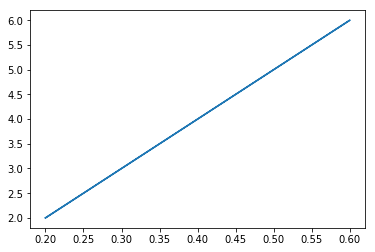

In [141]:
plt.plot(d1['Prob'], d2['History_score'])

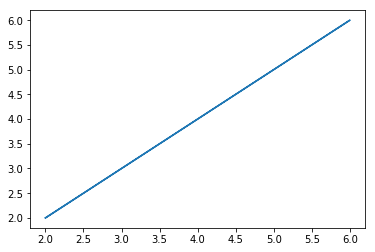

In [142]:
plt.plot(d1['District_Loss'], d2['District'])

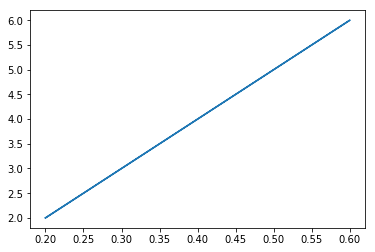

In [143]:
plt.plot(d1['Score_MV'], d2['MONEY_Marks'])

In [164]:
corr_matrix = raw_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()

In [169]:
sol.columns=['corr']

In [178]:
sol[sol['corr']< 0.9]

corr
TOTAL         Audit_Risk     0.888083
PARA_B        Audit_Risk     0.887775
Risk_B        Audit_Risk     0.887551
History       Prob           0.859266
              History_score  0.859266
Money_Value   Inherent_Risk  0.829715
Risk_D        Inherent_Risk  0.829489
Prob          Risk_F         0.815580
Risk_F        History_score  0.815580
Score         Risk           0.785263
Risk_F        CONTROL_RISK   0.760868
Score         MONEY_Marks    0.757863
Score_MV      Score          0.757863
History       CONTROL_RISK   0.754280
Inherent_Risk Audit_Risk     0.750862
RiSk_E        CONTROL_RISK   0.729623
Score_A       Score          0.719458
TOTAL         Inherent_Risk  0.689657
Score_MV      Risk           0.687724
Risk          MONEY_Marks    0.687724
Risk_B        Inherent_Risk  0.654405
PARA_B        Inherent_Risk  0.654349
District_Loss CONTROL_RISK   0.644834
CONTROL_RISK  District       0.644834
Prob          CONTROL_RISK   0.641700
CONTROL_RISK  History_score  0.641700
Score_B       Risk           0.634784
Score_A       Risk           0.618348
              Score_B        0.571429
Score_B       Score_MV       0.566752
...                               ...
PARA_B        PROB           0.042374
Score_B.1     LOSS_SCORE     0.036657
              PROB           0.036657
Marks         LOSS_SCORE     0.036657
PROB          Marks          0.036657
District      Loss           0.036042
District_Loss Loss           0.036042
Risk_C        LOSS_SCORE     0.035983
              PROB           0.035983
numbers       PROB           0.035597
              LOSS_SCORE     0.035597
Risk_D        RiSk_E         0.032853
Money_Value   RiSk_E         0.032730
Risk_D        LOSS_SCORE     0.031744
              PROB           0.031744
Money_Value   PROB           0.031653
              LOSS_SCORE     0.031653
Risk_D        District       0.028074
              District_Loss  0.028074
Money_Value   District_Loss  0.027912
              District       0.027912
Risk_D        Loss           0.024468
Money_Value   Loss           0.024406
Score_B       RiSk_E         0.013929
              District       0.006085
              District_Loss  0.006085
Score_B.1     Loss           0.004516
Marks         Loss           0.004516
numbers       Loss           0.001698
Risk_C        Loss           0.000829

[444 rows x 1 columns]

In [173]:
raw_data['numbers'].corr(raw_data['Marks'])

0.9081072692739455

480.0

In [ ]:
## Creating test and control groups

In [119]:
x = raw_data.drop(['Audit_Risk','Risk'],axis=1)
y_reg = raw_data['Audit_Risk']
y_class = raw_data['Risk']

In [120]:
from sklearn.model_selection import train_test_split

# default is 75% / 25% train-test split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, random_state=0)
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x, y_class, random_state=0)

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_reg = scaler.fit_transform(x_train_reg)
x_test_reg = scaler.transform(x_test_reg)

x_train_class = scaler.fit_transform(x_train_class)
x_test_class = scaler.transform(x_test_class)

c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\navarurh\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [133]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train_class, y_train_class)
    train_score_array.append(knn.score(x_train_class, y_train_class))
    test_score_array.append(knn.score(x_test_class, y_test_class))

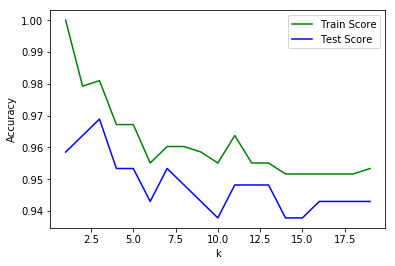

In [134]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [137]:
knn = KNeighborsClassifier(3)
knn.fit(x_train_class, y_train_class)
print('Train score: {:.4f}'.format(knn.score(x_train_class, y_train_class)))
print('Test score: {:.4f}'.format(knn.score(x_test_class, y_test_class)))

Train score: 0.9810
Test score: 0.9689
